In [1]:
import numpy as np
import pandas as pd
from time import process_time
from scipy.linalg import lu
from scipy.linalg import solve_triangular
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# Part A - Hand Calculations

Given the matrix 


$$
A = 
\begin{pmatrix}
    1 & 2 & 3 \\
    2 & 5 & 10 \\
    3 & 10 & 16
\end{pmatrix},
b = 
\begin{pmatrix}
    3 \\
    7 \\
    13
\end{pmatrix}
$$


## (a)
Perform LU-decomposition with pivoting to find $L, U$ and $P$.

### Answer:

In "regular" matrix operation form: 

\begin{gather*}
    \begin{pmatrix}
        1 & 2 & 3 \\
        2 & 5 & 10 \\
        3 & 10 & 16
    \end{pmatrix}
    \xrightarrow[]{R3 \leftrightarrow R1}
    \begin{pmatrix}
        3 & 10 & 16 \\
        2 & 5 & 10 \\
        1 & 2 & 3
    \end{pmatrix}
    \xrightarrow[R3 - \frac{1}{3} \cdot R1]{R2 - \frac{2}{3} \cdot R1}
    \begin{pmatrix}
        3 & 10 & 16 \\
        0 & -\frac{5}{3} & -\frac{2}{3} \\
        0 & -\frac{4}{3} & -\frac{7}{3}
    \end{pmatrix}\\
    \xrightarrow[]{R3 - \frac{4}{5}R2}
    \begin{pmatrix}
        3 & 10 & 16 \\
        0 & -\frac{5}{3} & -\frac{2}{3} \\
        0 & 0 & -\frac{9}{5}
    \end{pmatrix}.
\end{gather*}

From these operations, we gather that 

$$
L = 
\begin{pmatrix}
    1 & 0 & 0 \\
    \frac{2}{3} & 1 & 0 \\
    \frac{1}{3} & \frac{4}{5} & 1
\end{pmatrix},
U =
\begin{pmatrix}
    3 & 10 & 16 \\
    0 & -\frac{5}{3} & -\frac{2}{3} \\
    0 & 0 & -\frac{9}{5}
\end{pmatrix},
P = 
\begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    1 & 0 & 0
\end{pmatrix}.
$$



## (b)
Solve the equation system $Ax = b$ using forward and backward substitution.

### Answer
Let $d = Ux \Rightarrow Ld = Pb$,

$$
\begin{pmatrix}
    1 & 0 & 0 \\
    \frac{2}{3} & 1 & 0 \\
    \frac{1}{3} & \frac{4}{5} & 1
\end{pmatrix}
\begin{pmatrix}
    d_1 \\
    d_2 \\
    d_3
\end{pmatrix}
= 
\begin{pmatrix}
    0 & 0 & 1 \\
    0 & 1 & 0 \\
    1 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
    3 \\
    7 \\
    13
\end{pmatrix}
= 
\begin{pmatrix}
    13 \\
    7 \\
    3
\end{pmatrix}
$$

$$
\Rightarrow
\begin{cases}
    d_1 = 13 \\
    d_2 = 7 - \frac{2}{3} \cdot 13 = \frac{21}{3} - \frac{26}{3} = -\frac{5}{3} \\
    d_3 = 3 + \frac{4}{5} \cdot \frac{5}{3} - \frac{1}{3} \cdot 13 = \frac{9}{3} + \frac{4}{3} - \frac{13}{3} = 0. 
\end{cases}
$$

Solving for $Ux = d$ gives us
$$
\begin{pmatrix}
    3 & 10 & 16 \\
    0 & -\frac{5}{3} & -\frac{2}{3} \\
    0 & 0 & -\frac{9}{5}
\end{pmatrix}
\begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{pmatrix}
=
\begin{pmatrix}
    13 \\
    -5/3 \\
    0
\end{pmatrix}
$$

$$
\Rightarrow
\begin{cases}
    3 x_1 = 13 - 10 \Rightarrow x_1 = 1 \\
    \frac{5}{3} x_2 = \frac{5}{3} \Rightarrow x_2 = 1 \\
    x_3 = 0
\end{cases},
$$

thus
$$
x =
\begin{pmatrix}
    1 \\
    1 \\
    0
\end{pmatrix}.
$$


## (c)
Find (if possible) the Cholesky-decomposition. Follow the algorithm for the
Cholesky decomposition. Given the result, what is the conclusion?

### Answer

We perform LU-factorization without pivoting to preserve symmetry and get that


$$
\begin{pmatrix}
    1 & 2 & 3 \\
    2 & 5 & 10 \\
    3 & 10 & 16
\end{pmatrix}
\xrightarrow[R3 - 3R1]{R2 - 2R1}
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 1 & 4 \\
    0 & 4 & 7
\end{pmatrix}
\xrightarrow[]{R3 - 4R2}
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 1 & 4 \\
    0 & 0 & -9
\end{pmatrix}.
$$

Thus

$$
L = 
\begin{pmatrix}
    1 & 0 & 0 \\
    2 & 1 & 0 \\
    3 & 4 & 1
\end{pmatrix},
U = 
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 1 & 4 \\
    0 & 0 & -9
\end{pmatrix}.
$$

Next we factorize $U$ to obtain

$$
U 
=
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 1 & 4 \\
    0 & 0 & -9
\end{pmatrix}
=
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & -9
\end{pmatrix}
\begin{pmatrix}
    1 & 2 & 3 \\
    0 & 1 & 4 \\
    0 & 0 & 1
\end{pmatrix}
= 
D L^T,
$$

completing our LDLT decomposition where $A = LDL^T$. To obtain the Cholesky decomposition we 
want $A = L D ^{1/2} D ^{1/2} L^T = G G^T,$ but here we run into a problem since
$$
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & -9
\end{pmatrix} ^{1/2}
= 
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & \sqrt{-9}
\end{pmatrix},
$$

leaving us with a negative square root. This means that the matrix is not positive definite, and therefore
we cannot complete the Cholesky decomposition.

# Exercise 2

In the previous assignment you worked with a system derived from an electric circuit.
Let’s say that the input data, the voltages in the right-hand-side, are measured values
and the instrument used to measure has 1% inaccuracy. What accuracy in the solution
can we guarantee?

In [2]:
M = np.matrix('2 4 0 0 0 0; 0 4 1 2 2 0; 0 0 0 0 2 4; 1 -1 1 0 0 0; 1 -1 0 1 0 0; 0 0 1 0 -1 1; 0 0 0 1 -1 1')
np.linalg.cond(M)

4.6192358734214825

### Answer
The perturbation in input data is magnified by a factor of 4.62. Next, we can derive the following estimate of error in $x$:
$$\frac{||x - \hat{x}||}{||x||} \leq cond(A) \frac{||b - \hat{b}||}{||b||} = 4.62 \cdot 0.01 = 0.0462.$$
Thus we can guarantee a solution with an error of no more than 5%.

# Part B - Software calculations

In [3]:
df = pd.read_csv(r'network.csv', header=None)
A = df.to_numpy()

## (a)

Solve the system $𝐴𝑥_i = 𝑏_i, 𝑖 = 1, … ,20$ in a loop, using linalg.solve. For
simplicity, let the input pressures in all three nodes be equal to $i$, i.e. the loop
number.

### Calculation

In [4]:
time_a_start = process_time()
for i in range(20):
    b = np.zeros(4720)
    b[0] = i
    b[4599] = i
    b[4665] = i
    x = np.linalg.solve(A,b)
time_a_stop = process_time()

### Time

In [5]:
print(f'Time elapsed for calculation (a): {time_a_stop - time_a_start} seconds.')

Time elapsed for calculation (a): 104.216798 seconds.


## (b)
Repeat the same calculations, but use and take advantage of, the LU decomposition, forward and backward substitution.

### Calculation

In [6]:
time_b_start = process_time()
P, L, U = lu(A)
for i in range(20):
    b = np.zeros(4720)
    b[0] = i
    b[4599] = i
    b[4665] = i
    Pb = P.T @ b
    y = solve_triangular(L, Pb, lower=True)
    x = solve_triangular(U, y)
time_b_stop = process_time()

### Time

In [7]:
print(f'Time elapsed for calculation (b): {time_b_stop - time_b_start} seconds.')

Time elapsed for calculation (b): 11.263236000000006 seconds.


## (c)
Repeat the same calculations as in a), but this time without a loop. Store all $𝑏_i$ in a
4720 × 20-matrix 𝐵, where $𝐵 = (𝑏_1 𝑏_2 ⋯ 𝑏_{20}$). Use solve as in a) but
solve the systems $AX = B$ without a loop.

### Calculation

In [8]:
b = np.zeros((4720,20))
for i in range(20):
    b[0][i] = i
    b[4599][i] = i
    b[4665][i] = i
    
time_c_start = process_time()
x = np.linalg.solve(A,b)
time_c_stop = process_time()

### Time

In [9]:
print(f'Time elapsed for calculation (c): {time_c_stop - time_c_start} seconds.')

Time elapsed for calculation (c): 5.2247799999999955 seconds.


## (d)
Finally, repeat c) but use the so called sparse format and sparse solvers in the
package scipy.sparse. This means that you store the matrices $A$ and $B$ in
sparse format and use the sparse equation solver spsolve.

### Calculation

In [10]:
time_d_start = process_time()
sparse_A = csc_matrix(A)
sparse_B = csc_matrix(b)
x = spsolve(sparse_A, sparse_B)
time_d_stop = process_time()

### Time

In [11]:
print(f'Time elapsed for calculation (d): {time_d_stop - time_d_start} seconds.')

Time elapsed for calculation (d): 1.4693529999999981 seconds.


# Exercise 4
How do we know the matrix is sparse? It’s hard to see when we have large matrices.
One handy tool is to “spy” on the matrix, to plot only the non-zero elements as e.g.
dots. Use matlabplotlib.pyplot.spy to “spy” on the matrix 𝐴 (it seems to
be a good idea to use the option markersize=1, otherwise it’s hard to see the
pattern). Is the matrix sparse? Save the plot and submit it.

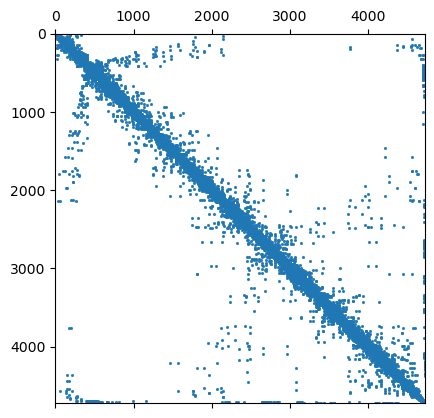

In [12]:
plt.spy(A, markersize=1)

### Answer
We can clearly see from the plot that the matrix is sparse. The (non-zero) entries are tightly centered around its main diagonal and mostly empty (zero) everywhere else.

# Exercise 5
What is sparse format? How is a matrix stored when we use this format? Create a
little sparse matrix, store in the sparse format and print it on the screen. How is it
actually stored?

In [13]:
arr = np.array([[0,0,0],[0,5,0],[7,0,9]])
print(csr_matrix(arr))

  (1, 1)	5
  (2, 0)	7
  (2, 2)	9


### Answer
When a matrix is sparse, i.e. contains more significantly more zero than non-zero values, storing such data in a two-dimensional matrix is inefficient both with regards to storage and matrix operations. Sparse format represents a matrix using only the matrix coordinates and value for each non-zero entry.